In [1]:

!pip install emoji
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.5 MB/s eta 0:00:00


In [28]:
import regex
import pandas as pd
import numpy as np
!pip install emoji
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import MaxNLocator
from plotly import express as px
import seaborn as sns
from datetime import *
import datetime as dt

In [29]:

def startsWithDate(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False


def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if startsWithAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

data = []
conversation = '/content/Updated_chat_data.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)



In [30]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-30-3e22e752aa02>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [31]:
df.tail(20)


,Date,Time,Author,Message
4676,2020-09-18,7:51 pm,Ed,😂 😂
4677,2020-09-18,7:51 pm,Rohit,She marking maybe
4678,2020-09-18,7:51 pm,Rohit,G3 few only marked right
4679,2020-09-18,7:51 pm,Rohit,I saw morning like 3 groups only
4680,2020-09-20,12:51 pm,Ed,<Media omitted>
4681,2020-09-20,12:52 pm,Ed,I see kk I can hidden it
4682,2020-09-20,12:53 pm,Rohit,Because we have shared alot private things her...
4683,2020-09-20,12:53 pm,Rohit,Np np
4684,2020-09-20,12:53 pm,Ed,OK Bro no worry
4685,2020-09-20,12:53 pm,Ed,@60183560200 can?


In [32]:
df.info()
df.Author.unique()
total_messages = df.shape[0]
print(total_messages)
media_messages = df[df["Message"]==''].shape[0]
print(media_messages)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4696 non-null   datetime64[ns]
 1   Time     4696 non-null   object        
 2   Author   4696 non-null   object        
 3   Message  4696 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 146.9+ KB
4696
0


In [33]:
df.shape
df.info()
df.isnull().sum()
df.head(20)
df.tail(20)
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

df['Author'].nunique()

df['Author'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4696 non-null   datetime64[ns]
 1   Time     4696 non-null   object        
 2   Author   4696 non-null   object        
 3   Message  4696 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 146.9+ KB


array(['Ed', 'Rohit'], dtype=object)

In [34]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)


df = df[['Date','Day','Time','Author','Message']]


df['Day'] = df['Day'].astype('category')


df.head()

df['Letter'] = df['Message'].apply(lambda s : len(s))


df['Word'] = df['Message'].apply(lambda s : len(s.split(' ')))


URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)


MEDIAPATTERN = r''
df['Media_Count'] = df.Message.apply(lambda x : regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

df

,Date,Day,Time,Author,Message,Letter,Word,urlcount,Media_Count
0,2020-05-02,Saturday,10:00 am,Ed,We share our knowledge here and pass year,41,8,0,42
1,2020-05-02,Saturday,10:01 am,Ed,<Media omitted>,15,2,0,16
2,2020-05-02,Saturday,10:01 am,Ed,Easy to communicate 🤣🤣🤣,23,4,0,24
3,2020-05-02,Saturday,10:01 am,Rohit,💪🏾,2,1,0,3
4,2020-05-02,Saturday,10:01 am,Rohit,yeah,4,1,0,5
...,...,...,...,...,...,...,...,...,...
4691,2020-09-20,Sunday,5:32 pm,Ed,who have finish math lecture ?,30,6,0,31
4692,2020-09-21,Monday,2:25 pm,Ed,You deleted this message,24,4,0,25
4693,2020-09-21,Monday,2:26 pm,Ed,<Media omitted>,15,2,0,16
4694,2020-09-21,Monday,2:26 pm,Rohit,onz onz,7,2,0,8


In [35]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == ''].shape[0]
print('Personal Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))


Personal Chat Stats : 
Total Number of Messages : 4696
Total Number of Media Messages : 0


In [36]:
l = df.Author.unique()
for i in range(len(l)):
  req_df = df[df["Author"] == l[i]]
  print(f'--> Stats of {l[i]} <-- ')
  print('Total Message Sent : ', req_df.shape[0])
  print()
  print('----------------------------------------------------------n')

--> Stats of Ed <-- 
Total Message Sent :  2140

----------------------------------------------------------n
--> Stats of Rohit <-- 
Total Message Sent :  2556

----------------------------------------------------------n


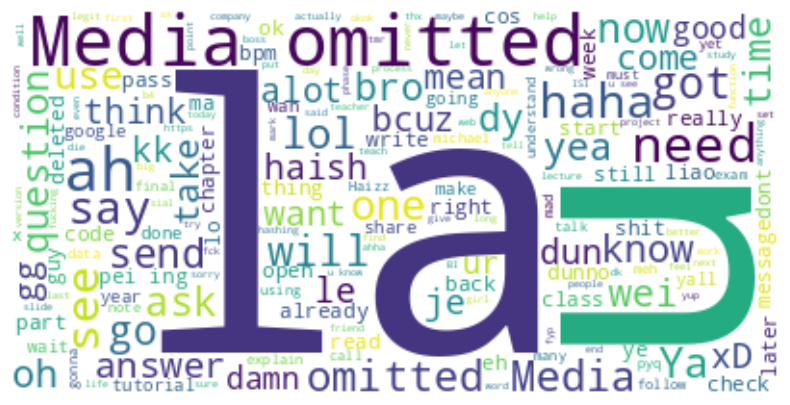

In [37]:
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
l = df.Author.unique()

for i in range(len(l)):
  req_df = df[df["Author"] == l[i]]
  print(l[i],'  ->  ',req_df.shape[0])

Ed   ->   2140
Rohit   ->   2556


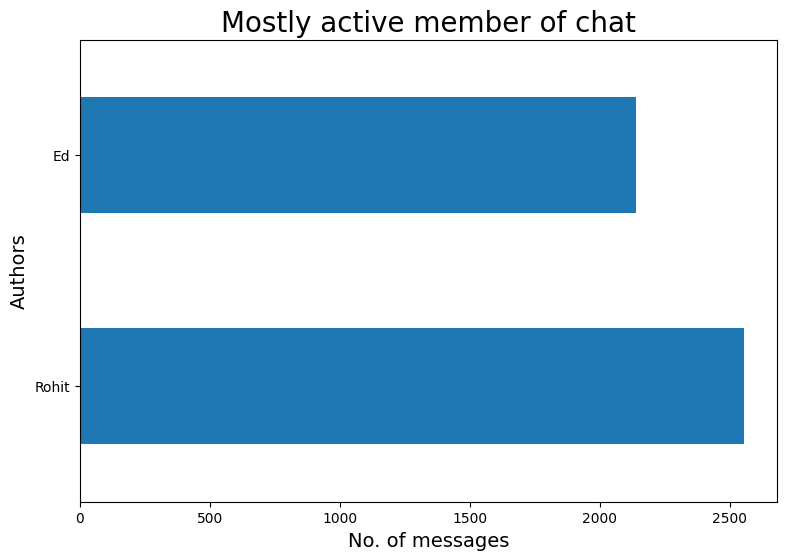

In [39]:
plt.figure(figsize=(9,6))
author_value_counts = df['Author'].value_counts()
most_active = author_value_counts.head(10)
most_active.plot.barh()

plt.xlabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

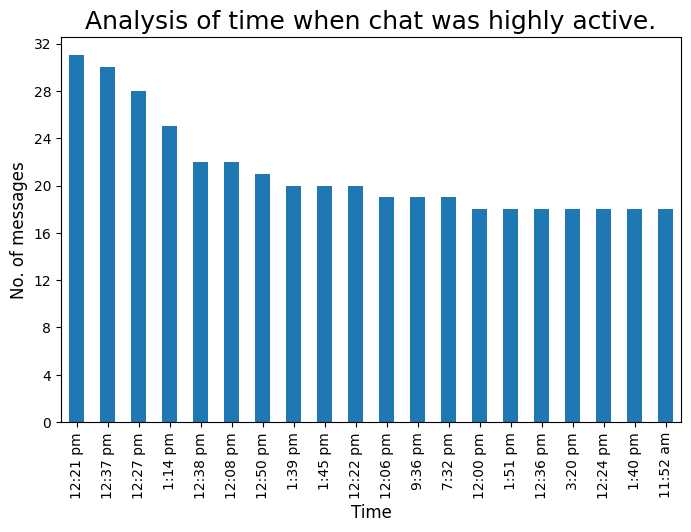

In [40]:
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when chat was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

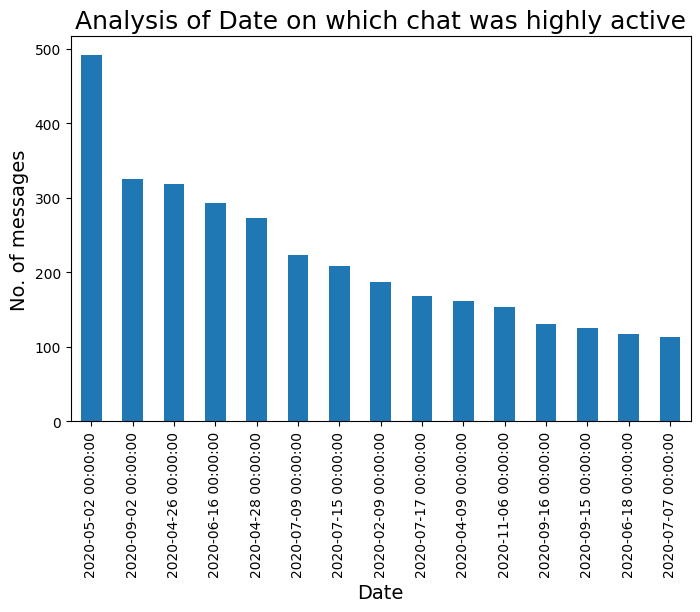

In [41]:
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which chat was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [42]:
lst = []
for i in df['Time']:
  out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
  lst.append(out_time)
df['24H_Time'] = lst
df['Hours'] = df['24H_Time'].apply(lambda x : x.split(':')[0])

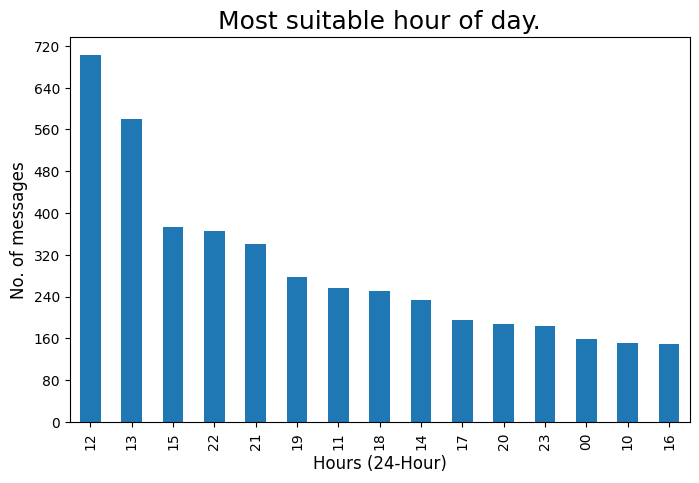

In [43]:
plt.figure(figsize=(8,5))
std_time = df['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()